In [11]:
# Import libraries
# all plots will be set directly below the code cell that produced it
%matplotlib inline
from matplotlib import pyplot as plt
# set inline plots size
plt.rcParams["figure.figsize"] = (12, 7) # (w, h)
import numpy as np
import cv2 as cv

In [24]:
!wget https://www.dropbox.com/s/gi5ph9oieeklaxp/person.png?dl=0 -O person.jpg

--2022-08-30 12:38:20--  https://www.dropbox.com/s/gi5ph9oieeklaxp/person.png?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/gi5ph9oieeklaxp/person.png [following]
--2022-08-30 12:38:21--  https://www.dropbox.com/s/raw/gi5ph9oieeklaxp/person.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2b89f7ba28c7e73882d6bd4dce.dl.dropboxusercontent.com/cd/0/inline/Br_fPoT1T49vjYckp5_rIS2IcmgJ-MqakqcMdnuVzxmhK8FTg2rH40qp6QPOUcMpa67n24ZluNX4IejMH4uAgsnfFF0rbwsH4Fa_a-s2-SpZCdr1tATBBm4m9Utix1nrftLWiLq0AkKASv15zI3ta65UpHvRZQScAviUbo4RYwtmrg/file# [following]
--2022-08-30 12:38:22--  https://uc2b89f7ba28c7e73882d6bd4dce.dl.dropboxusercontent.com/cd/0/inline/Br_fPoT1T49vjYckp5_rIS2IcmgJ-MqakqcMdnuVzxmhK8FTg2rH40qp6QPOUcMpa67n24ZluNX4Iej

### Red eyes detection

**Red eyes detection is done as follows:**

$(Luminance>=0.25)AND(Saturation >= 0.4) AND (0.5<Luminance/Saturation<1.5)AND (Hue<=14$ $OR$ $  Hue>=324)$

**Red eyes detection in OpenCV is done as follows:**

$(Luminance>=64)AND(Saturation >= 100) AND (0.5<Luminance/Saturation<1.5)AND (Hue<=7$ $OR$ $  Hue>=162)$

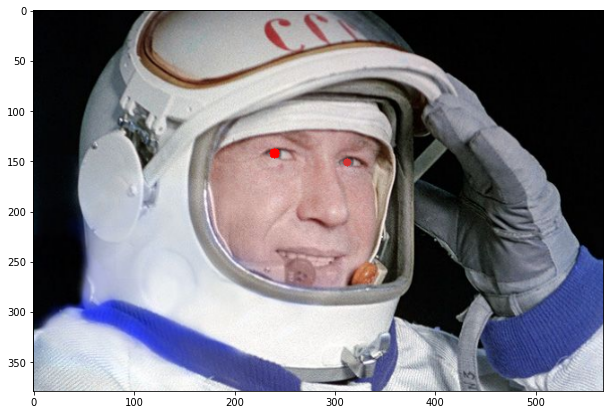

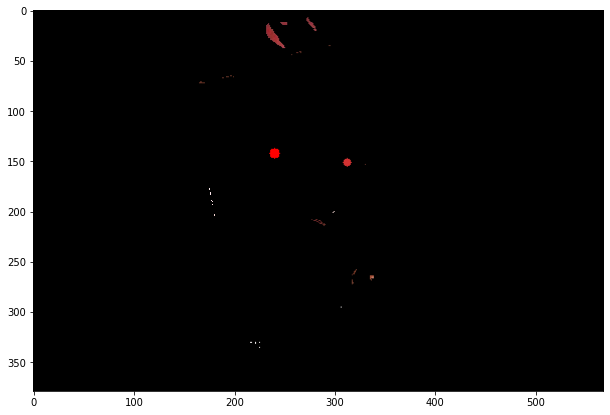

In [45]:
# load an image
img_person = cv.imread('person.jpg', cv.IMREAD_COLOR)
img_person = cv.cvtColor(img_person, cv.COLOR_BGR2RGB)
# draw red eyes
red_eyes = cv.circle(img_person,(240,142), 5, (255,0,0), -1)
red_eyes = cv.circle(red_eyes,(312,151), 4, (210,50,50), -1)
# show an image
plt.imshow(red_eyes)
plt.show()

# conver to HSV (hue, saturation, value)
img_person_hls = cv.cvtColor(img_person, cv.COLOR_RGB2HLS)
# split to three channels
img_h, img_l, img_s = cv.split(img_person_hls)


# detecting red eyes
for i in range (img_person.shape[0]):
  for j in range  (img_person.shape[1]):
    if (img_l[i,j]>=64) and (img_s[i,j] >= 100) and (img_l[i,j]/img_s[i,j]>0.5) and (img_l[i,j]/img_s[i,j]<1.5) and (img_h[i,j]<=7 or img_h[i,j]>=162):
      pass
    else: 
      img_person[i,j] = 0
      
# show detected eyes 
plt.imshow(red_eyes)
plt.show()
